In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import cluster, datasets

##colors.TwoSlopeNorm(vmin=-4000., vcenter=0., vmax=10000)

In [3]:
housing = pd.read_csv("zip_housing.csv")

In [4]:
housing

,property_id,prop_type,year_built,is_new_construction,beds,baths_full,baths_half,garage,price,lot_size,building_size,line,neighborhoods,city,county,state_code,postal_code
0,O2889402305,multi_family,1906.0,f,NaN,NaN,NaN,3.0,570000,7057.0,1756.0,6375 Converse Ave,"['Florence-Graham', 'South LA']",Los Angeles,Los Angeles,CA,90001
1,O1305476579,single_family,1913.0,f,3.0,1.0,1.0,1.0,470000,5721.0,1030.0,7916 Alix Ave,"['Florence-Graham', 'South LA']",Los Angeles,Los Angeles,CA,90001
2,O9299703972,multi_family,1938.0,f,NaN,NaN,NaN,NaN,830000,5495.0,2503.0,1222 E 78th St,['South LA'],Los Angeles,Los Angeles,CA,90001
3,O2866856410,single_family,1905.0,f,4.0,2.0,NaN,NaN,400000,5387.0,1248.0,1659 E 70th St,['South LA'],Los Angeles,Los Angeles,CA,90001
4,O2823776981,condo,1912.0,f,5.0,2.0,NaN,NaN,659000,5667.0,1897.0,1364 E 58th Pl,['South LA'],Los Angeles,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98073,O1392454616,single_family,2006.0,f,3.0,2.0,1.0,NaN,275000,2614.0,1430.0,2365 LA Villa Way,"['Northeast Redding', 'The Villages at Shasta ...",Redding,Shasta,CA,96003
98074,O2959173930,NaN,NaN,f,NaN,NaN,NaN,NaN,899000,NaN,NaN,13450 Mitchellinda Dr,NaN,Redding,Shasta,CA,96003
98075,O1290952370,single_family,1977.0,f,3.0,2.0,NaN,5.0,483500,89734.0,2552.0,19287 Roxie Ln,NaN,Redding,Shasta,CA,96003
98076,O1523744489,single_family,1984.0,f,4.0,3.0,NaN,4.0,345000,87120.0,2040.0,13143 Tamera Way,NaN,Redding,Shasta,CA,96003


In [5]:
housing = housing.fillna(housing.mean()).astype({"year_built": int, "beds": int, "baths_full": int, "baths_half": int, "garage": int,"price": int,
                         "lot_size": int,"building_size": int, "postal_code": str})

In [6]:
housing.head(10)

,property_id,prop_type,year_built,is_new_construction,beds,baths_full,baths_half,garage,price,lot_size,building_size,line,neighborhoods,city,county,state_code,postal_code
0,O2889402305,multi_family,1906,f,3,2,1,3,570000,7057,1756,6375 Converse Ave,"['Florence-Graham', 'South LA']",Los Angeles,Los Angeles,CA,90001
1,O1305476579,single_family,1913,f,3,1,1,1,470000,5721,1030,7916 Alix Ave,"['Florence-Graham', 'South LA']",Los Angeles,Los Angeles,CA,90001
2,O9299703972,multi_family,1938,f,3,2,1,2,830000,5495,2503,1222 E 78th St,['South LA'],Los Angeles,Los Angeles,CA,90001
3,O2866856410,single_family,1905,f,4,2,1,2,400000,5387,1248,1659 E 70th St,['South LA'],Los Angeles,Los Angeles,CA,90001
4,O2823776981,condo,1912,f,5,2,1,2,659000,5667,1897,1364 E 58th Pl,['South LA'],Los Angeles,Los Angeles,CA,90001
5,O1174561323,single_family,1920,f,5,5,1,2,477000,6043,2344,7537 Maie Ave,['South LA'],Los Angeles,Los Angeles,CA,90001
6,O1387647983,multi_family,1971,f,8,4,1,2,600000,4365,2616,8308 Hooper Ave,['South LA'],Los Angeles,Los Angeles,CA,90001
7,O1238994138,single_family,1930,f,2,1,1,1,420000,1536,784,7708 Stanford Ave,"['South LA', 'Florence']",Los Angeles,Los Angeles,CA,90001
8,O1296756349,multi_family,1964,f,3,2,1,3,545000,6000,1568,8126 Crockett Blvd,['South LA'],Los Angeles,Los Angeles,CA,90001
9,O1223156112,single_family,1937,f,3,1,1,2,530000,5103,1198,649 E 76th Pl,"['South LA', 'Florence']",Los Angeles,Los Angeles,CA,90001


[Text(0.5, 0, 'year_built'),
 Text(1.5, 0, 'beds'),
 Text(2.5, 0, 'baths_full'),
 Text(3.5, 0, 'baths_half'),
 Text(4.5, 0, 'garage'),
 Text(5.5, 0, 'price'),
 Text(6.5, 0, 'lot_size'),
 Text(7.5, 0, 'building_size')]

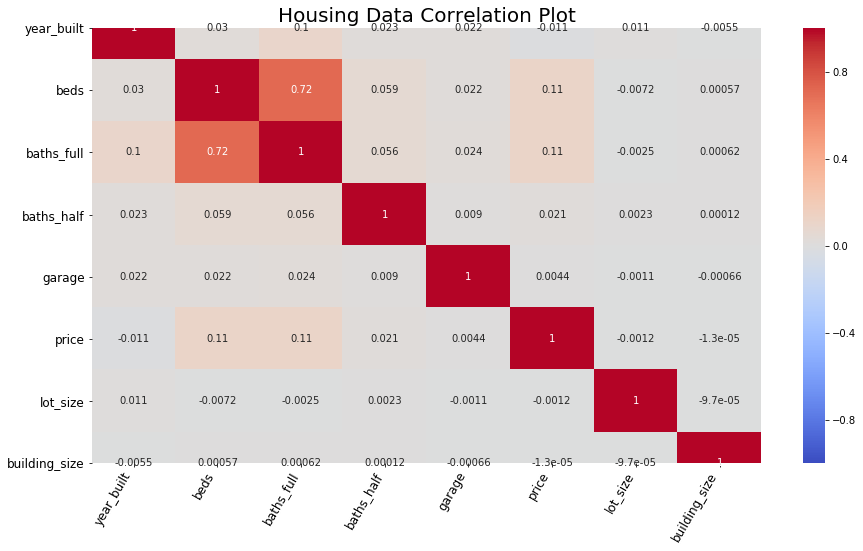

In [7]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(housing.corr(), annot = True, 
            cmap=plt.get_cmap('coolwarm'), vmin = -1, vmax = 1)
plt.title("Housing Data Correlation Plot", fontsize = 20)
ax.set_yticklabels(ax.get_yticklabels(), rotation='0', fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation="60", horizontalalignment='right', fontsize = 12)

In [8]:
demographic = pd.read_csv("Modified_data/demographic_refined.csv")
demographic

,zipcode,county_name,city,population,population_rank,city_name,aland,median_household_income,average_household_income,per_capita_income,...,hhi_200k_or_more,race_and_ethnicity_total,population_density_sq_mi,median_age,educational_attainment_bachelors,educational_attainment_graduate,family_poverty_pct,unemployment_pct,housing_units,median_value_of_owner_occupied_units
0,90242,Los Angeles,Downey,112322,59,Downey,11788002,71233,85792,26335,...,738,42694,9384.0,34.1,0.1440,0.06500,0.07600,0.05700,12713,513900
1,90747,Los Angeles,Carson,92079,83,Carson,16629,72803,91209,28026,...,704,33215,4884.0,39.7,0.1885,0.07477,0.08100,0.06430,9331,464175
2,91501,Los Angeles,Burbank,103703,71,Burbank; Glendale,10275284,67817,94589,38247,...,965,20511,5170.0,40.5,0.2810,0.14800,0.09705,0.08100,8417,770500
3,92115,San Diego,San Diego,1409573,2,San Diego,16845692,51636,73784,25970,...,1130,64343,9896.0,28.3,0.2020,0.12396,0.11400,0.06500,23089,499100
4,92543,Riverside,Hemet,84542,100,East Hemet; Hemet,45646461,33319,45497,16435,...,160,38314,2174.0,35.2,0.0570,0.02301,0.23790,0.15000,14367,136600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,90042,Los Angeles,Los Angeles,3966936,1,Los Angeles,12036777,64267,87211,30575,...,1641,63193,13600.0,35.8,0.2130,0.11000,0.11300,0.06800,22061,627200
970,90043,Los Angeles,Los Angeles,3966936,1,Los Angeles; View Park-Windsor Hills,10705825,54729,77169,31101,...,1236,45873,11096.0,40.1,0.1600,0.10205,0.14210,0.09000,18748,556400
971,90044,Los Angeles,Los Angeles,3966936,1,Los Angeles; West Athens; Westmont,13303667,35981,51524,16278,...,474,99443,19360.0,31.6,0.0590,0.02000,0.26200,0.07104,30461,391100
972,90045,Los Angeles,Los Angeles,3966936,1,Del Aire; Los Angeles,27794039,104578,140825,56291,...,3432,40567,3780.0,35.1,0.3830,0.22500,0.04602,0.05000,17133,959400


In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_demo = demographic.select_dtypes(include=numerics)

In [13]:
temp = demographic

In [20]:
temp = temp.drop("zipcode", axis=1)

In [21]:
tc = temp.corr()

In [28]:
tc.to_csv('demo_corr.csv')

[Text(0.5, 0, 'population'),
 Text(1.5, 0, 'population_rank'),
 Text(2.5, 0, 'aland'),
 Text(3.5, 0, 'median_household_income'),
 Text(4.5, 0, 'average_household_income'),
 Text(5.5, 0, 'per_capita_income'),
 Text(6.5, 0, 'percent_of_households_with_incomes_200000_or_more'),
 Text(7.5, 0, 'householder_under_25_years'),
 Text(8.5, 0, 'householder_25_to_44_years'),
 Text(9.5, 0, 'householder_45_to_64_years'),
 Text(10.5, 0, 'householder_65_years_and_over'),
 Text(11.5, 0, 'hhi_total'),
 Text(12.5, 0, 'hhi_lt_25k'),
 Text(13.5, 0, 'hhi_25k_to_49k'),
 Text(14.5, 0, 'hhi_50k_to_749k'),
 Text(15.5, 0, 'hhi_75k_to_999k'),
 Text(16.5, 0, 'hhi_100k_to_1490k'),
 Text(17.5, 0, 'hhi_150k_to_1999k'),
 Text(18.5, 0, 'hhi_200k_or_more'),
 Text(19.5, 0, 'race_and_ethnicity_total'),
 Text(20.5, 0, 'population_density_sq_mi'),
 Text(21.5, 0, 'median_age'),
 Text(22.5, 0, 'educational_attainment_bachelors'),
 Text(23.5, 0, 'educational_attainment_graduate'),
 Text(24.5, 0, 'family_poverty_pct'),
 Text(25

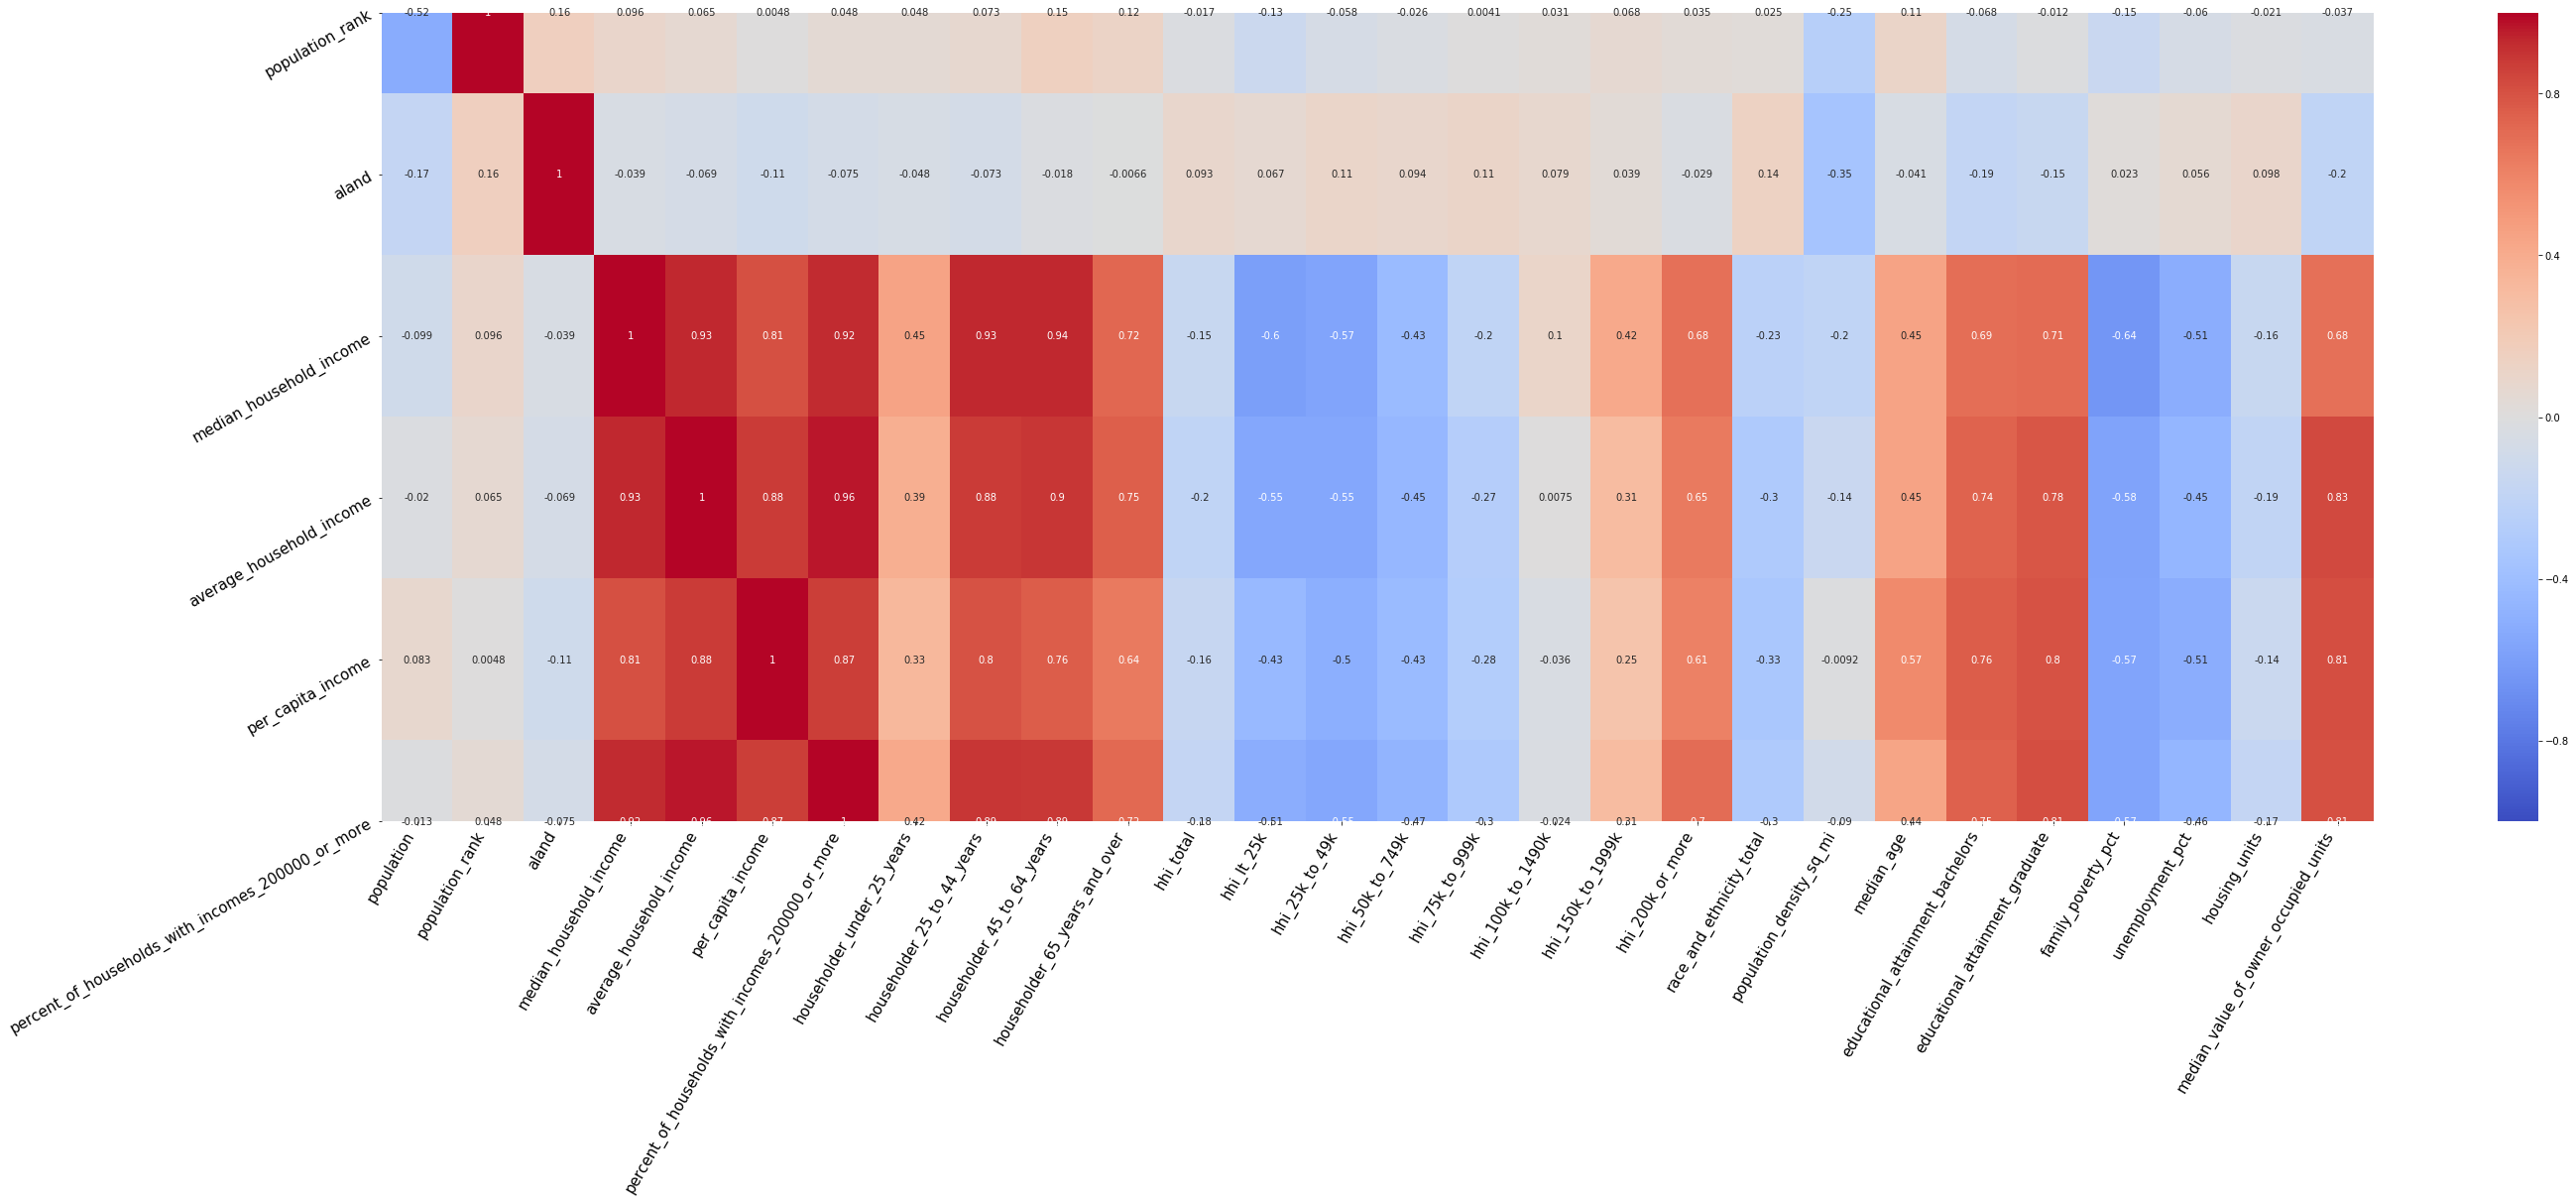

In [27]:
##d_corr = demographic.corr()
##d_corr.style.background_gradient(cmap='coolwarm')
fig, ax = plt.subplots(figsize=(45,15))
sns.heatmap(tc[1:7], annot = True, 
            cmap=plt.get_cmap('coolwarm'), vmin = -1, vmax = 1)
ax.set_yticklabels(ax.get_yticklabels(), rotation="30", fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation="60", horizontalalignment='right', fontsize = 15)
##plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

[Text(0.5, 0, 'zipcode'),
 Text(1.5, 0, 'population'),
 Text(2.5, 0, 'population_rank'),
 Text(3.5, 0, 'aland'),
 Text(4.5, 0, 'median_household_income'),
 Text(5.5, 0, 'average_household_income'),
 Text(6.5, 0, 'per_capita_income'),
 Text(7.5, 0, 'percent_of_households_with_incomes_200000_or_more'),
 Text(8.5, 0, 'householder_under_25_years'),
 Text(9.5, 0, 'householder_25_to_44_years'),
 Text(10.5, 0, 'householder_45_to_64_years'),
 Text(11.5, 0, 'householder_65_years_and_over'),
 Text(12.5, 0, 'hhi_total'),
 Text(13.5, 0, 'hhi_lt_25k'),
 Text(14.5, 0, 'hhi_25k_to_49k'),
 Text(15.5, 0, 'hhi_50k_to_749k'),
 Text(16.5, 0, 'hhi_75k_to_999k'),
 Text(17.5, 0, 'hhi_100k_to_1490k'),
 Text(18.5, 0, 'hhi_150k_to_1999k'),
 Text(19.5, 0, 'hhi_200k_or_more'),
 Text(20.5, 0, 'race_and_ethnicity_total'),
 Text(21.5, 0, 'population_density_sq_mi'),
 Text(22.5, 0, 'median_age'),
 Text(23.5, 0, 'educational_attainment_bachelors'),
 Text(24.5, 0, 'educational_attainment_graduate'),
 Text(25.5, 0, 'fam

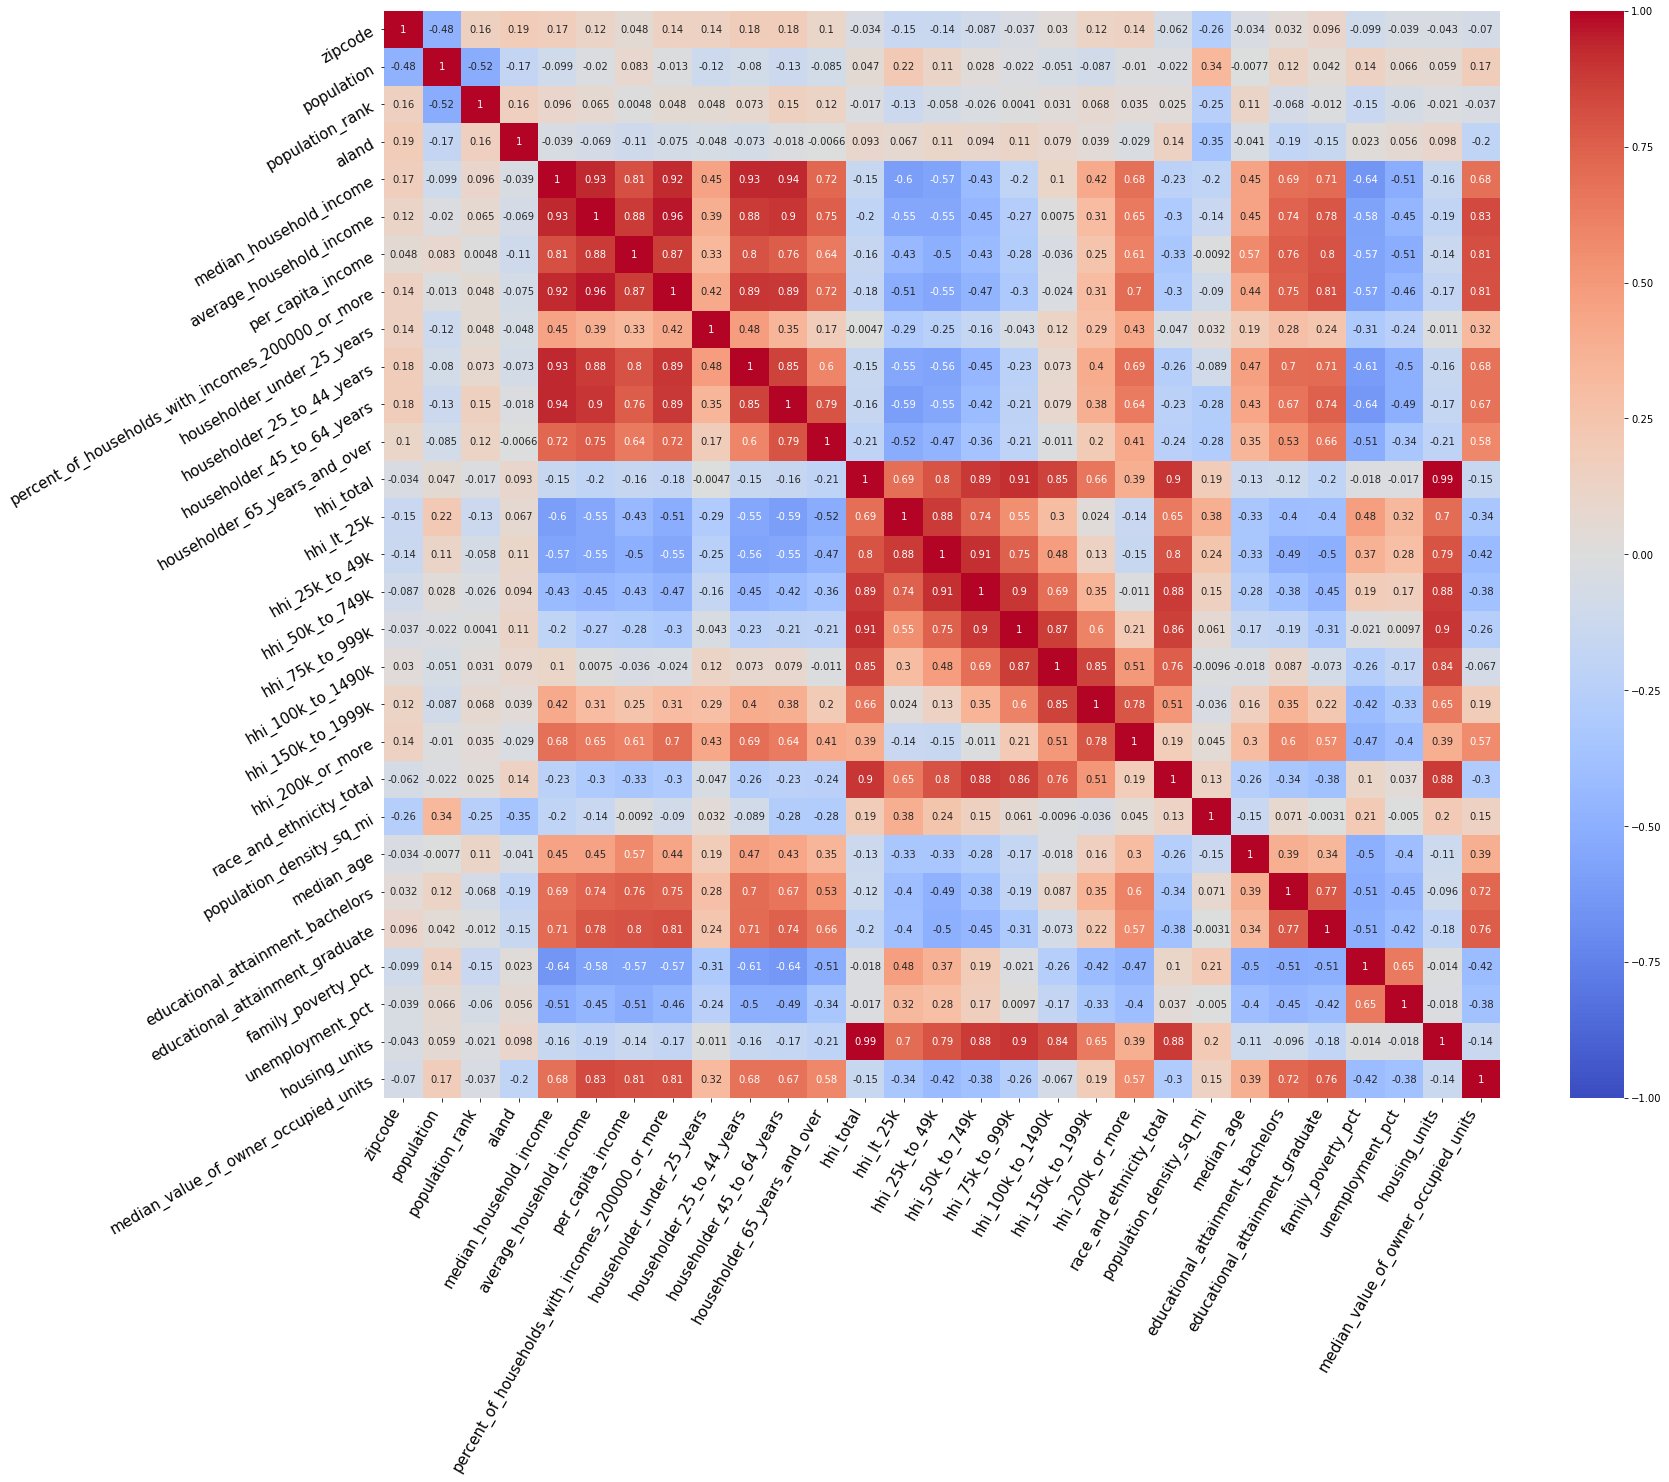

In [9]:
##d_corr = demographic.corr()
##d_corr.style.background_gradient(cmap='coolwarm')
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(demographic.corr(), annot = True, 
            cmap=plt.get_cmap('coolwarm'), vmin = -1, vmax = 1)
ax.set_yticklabels(ax.get_yticklabels(), rotation="30", fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation="60", horizontalalignment='right', fontsize = 15)
##plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

In [10]:
X = pd.DataFrame(scale(new_demo), index=new_demo.index, columns=new_demo.columns)

In [11]:
pca_loadings_list = []
for i in range(len(new_demo.columns)):
    temp = "V" + str(i+1)
    pca_loadings_list.append(temp)
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=new_demo.columns, columns=pca_loadings_list)

In [12]:
pca_plot_list = []
for i in range(len(new_demo.columns)):
    temp = "PC" + str(i+1)
    pca_plot_list.append(temp)
pca = PCA()
demographic_plot = pd.DataFrame(pca.fit_transform(X), columns=pca_plot_list, index=X.index)

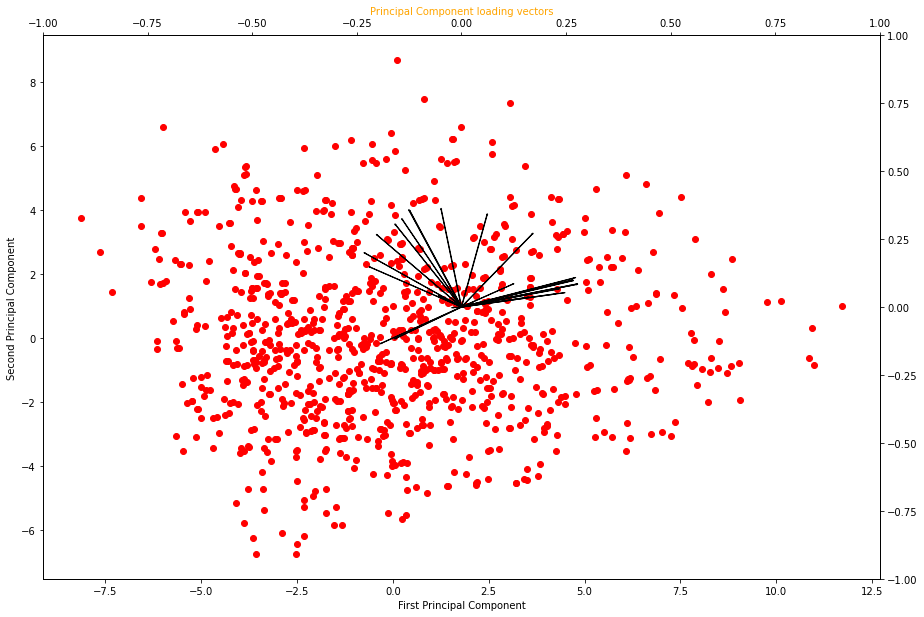

In [13]:
fig , ax1 = plt.subplots(figsize=(15,10))


for i in demographic_plot.index:
    ax1.scatter(demographic_plot.PC1[i], demographic_plot.PC2[i], color = 'red')


ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

for i in range(len(new_demo.columns)):
    ax2.arrow(0,0,pca_loadings.V1[i], pca_loadings.V2[i])

(0.0, 1.0)

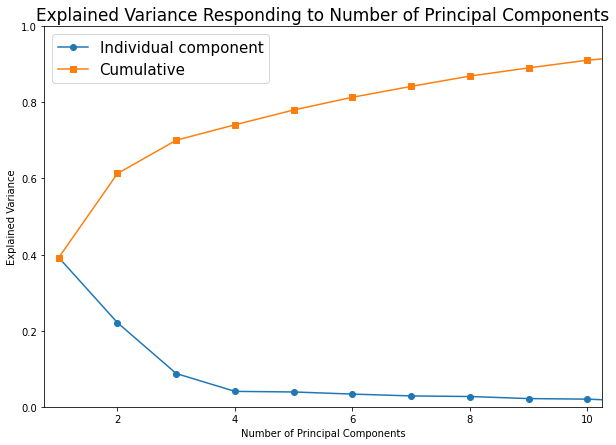

In [27]:
plt.figure(figsize=(10,7))

plt.plot([i+1 for i in range(len(new_demo.columns))], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([i+1 for i in range(len(new_demo.columns))], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')
plt.legend(fontsize = 15)
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.title('Explained Variance Responding to Number of Principal Components', fontsize = 17)
plt.xlim(0.75,10.25)
plt.ylim(0, 1)

In [10]:
housing_groupby_city = housing.groupby("city", as_index = False).median()
housing_groupby_city = housing_groupby_city.sort_values(by='price', ascending=False)
housing_groupby_city

,city,year_built,beds,baths_full,baths_half,garage,price,lot_size,building_size
85,Palo Alto,1956.0,3.0,2.0,1.0,2.0,2744000.0,6900.0,1762.0
77,Newport Beach,1973.0,3.0,2.0,1.0,2.0,2245000.0,6375.0,2244.0
74,Mountain View,1978.0,3.0,2.0,1.0,2.0,1700000.0,5245.0,1526.0
97,Redwood City,1962.0,3.0,2.0,1.0,2.0,1650000.0,6782.0,1620.0
115,Santa Barbara,1971.0,3.0,2.0,1.0,2.0,1567500.0,9583.0,0.0
...,...,...,...,...,...,...,...,...,...
42,Fresno,1972.0,3.0,2.0,1.0,2.0,295000.0,7128.0,1503.0
48,Hemet,1978.0,3.0,2.0,1.0,2.0,293750.0,7405.0,1465.0
4,Apple Valley,1983.0,3.0,2.0,1.0,2.0,291500.0,25651.0,2176.5
5,Bakersfield,1979.0,3.0,2.0,1.0,2.0,279000.0,7703.0,1634.0


In [11]:
##fig, ax = plt.subplots(figsize=(25,20))
##plt.plot(housing_groupby_city["city"], housing_groupby_city["price"])
##ax.set_yticklabels(ax.get_yticklabels())
#ax.set_xticklabels(ax.get_xticklabels(), rotation="60", horizontalalignment='right')
housing_groupby_city_top_10 = housing_groupby_city.head(10)
top_10_list = housing_groupby_city_top_10['city'].tolist()
housing_groupby_city_top_10

,city,year_built,beds,baths_full,baths_half,garage,price,lot_size,building_size
85,Palo Alto,1956.0,3.0,2.0,1.0,2.0,2744000.0,6900.0,1762.0
77,Newport Beach,1973.0,3.0,2.0,1.0,2.0,2245000.0,6375.0,2244.0
74,Mountain View,1978.0,3.0,2.0,1.0,2.0,1700000.0,5245.0,1526.0
97,Redwood City,1962.0,3.0,2.0,1.0,2.0,1650000.0,6782.0,1620.0
115,Santa Barbara,1971.0,3.0,2.0,1.0,2.0,1567500.0,9583.0,0.0
126,Sunnyvale,1972.0,3.0,2.0,1.0,2.0,1407500.0,6240.5,1529.0
120,Santa Monica,1969.0,2.0,2.0,1.0,2.0,1395000.0,8008.0,1472.0
36,Encinitas,1983.0,3.0,2.0,1.0,2.0,1380500.0,16446.0,1828.5
108,San Francisco,1942.0,3.0,2.0,1.0,2.0,1380000.0,5001.0,1385.0
112,San Mateo,1958.0,3.0,2.0,1.0,2.0,1380000.0,7548.0,1440.0


(0, 6000000)

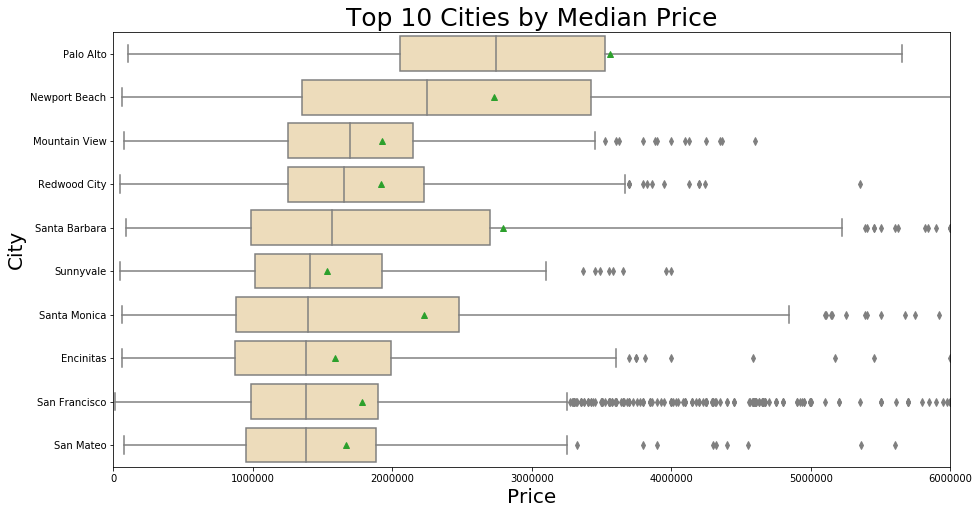

In [13]:
grouped_price = housing[["city", "price"]]
grouped_price_top_10 = grouped_price[grouped_price["city"].isin(top_10_list)]
##grouped_price_top_10.boxplot()
##grouped_price_top_10 = grouped_price_top_10.groupby("city", as_index = False)
##grouped_price_top_10.boxplot(subplots = False, rot=45, figsize=(8,10))
##plt.ylim(0, 5000000)
fig , ax1 = plt.subplots(figsize=(15,8))

median_price_boxplot = sns.boxplot(y='city',x='price',data=grouped_price_top_10,orient="h", color = "wheat", showmeans=True, 
           order = ['Palo Alto', 'Newport Beach', 'Mountain View', 'Redwood City', 'Santa Barbara', 'Sunnyvale',
                   'Santa Monica', 'Encinitas', 'San Francisco', 'San Mateo'])
plt.title("Top 10 Cities by Median Price", fontsize = 25)
plt.xlabel("Price", fontsize = 20)
plt.ylabel("City", fontsize = 20)
plt.xlim(0, 6000000)

In [14]:
housing_groupby_city = housing.groupby("city", as_index = False).median()
housing_groupby_city = housing_groupby_city.sort_values(by='price', ascending=True)
housing_groupby_city

,city,year_built,beds,baths_full,baths_half,garage,price,lot_size,building_size
131,Tulare,1972.0,3.0,2.0,1.0,2.0,267000.0,8134.5,1279.0
5,Bakersfield,1979.0,3.0,2.0,1.0,2.0,279000.0,7703.0,1634.0
4,Apple Valley,1983.0,3.0,2.0,1.0,2.0,291500.0,25651.0,2176.5
48,Hemet,1978.0,3.0,2.0,1.0,2.0,293750.0,7405.0,1465.0
139,Visalia,1972.0,3.0,2.0,1.0,2.0,295000.0,7405.0,1359.0
...,...,...,...,...,...,...,...,...,...
115,Santa Barbara,1971.0,3.0,2.0,1.0,2.0,1567500.0,9583.0,0.0
97,Redwood City,1962.0,3.0,2.0,1.0,2.0,1650000.0,6782.0,1620.0
74,Mountain View,1978.0,3.0,2.0,1.0,2.0,1700000.0,5245.0,1526.0
77,Newport Beach,1973.0,3.0,2.0,1.0,2.0,2245000.0,6375.0,2244.0


In [16]:
top_10_list

['Tulare',
 'Bakersfield',
 'Apple Valley',
 'Hemet',
 'Visalia',
 'Fresno',
 'Merced',
 'Madera',
 'Victorville',
 'Redding']

(0, 6000000)

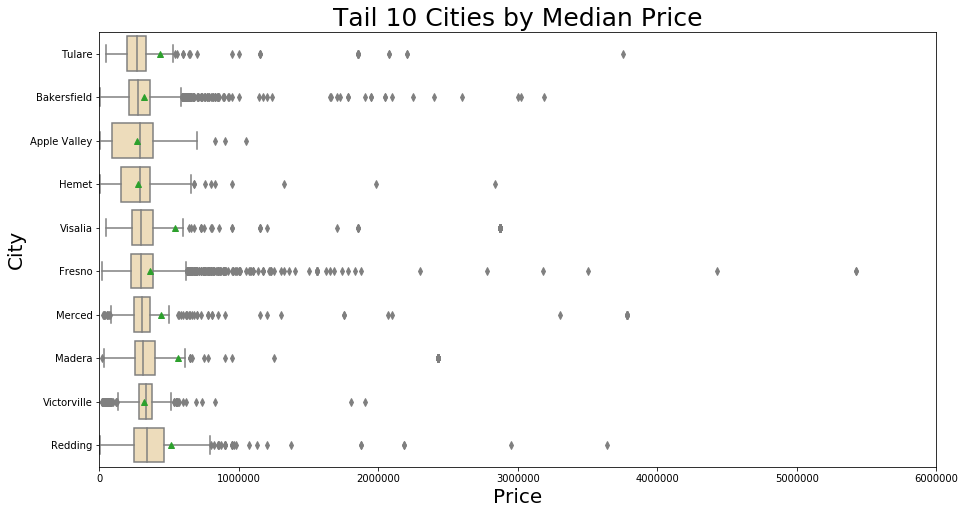

In [18]:
housing_groupby_city_top_10 = housing_groupby_city.head(10)
top_10_list = housing_groupby_city_top_10['city'].tolist()
housing_groupby_city_top_10
grouped_price = housing[["city", "price"]]
grouped_price_top_10 = grouped_price[grouped_price["city"].isin(top_10_list)]
##grouped_price_top_10.boxplot()
##grouped_price_top_10 = grouped_price_top_10.groupby("city", as_index = False)
##grouped_price_top_10.boxplot(subplots = False, rot=45, figsize=(8,10))
##plt.ylim(0, 5000000)
fig , ax1 = plt.subplots(figsize=(15,8))

median_price_boxplot = sns.boxplot(y='city',x='price',data=grouped_price_top_10,orient="h", color = "wheat", showmeans=True, 
           order = top_10_list)
plt.title("Tail 10 Cities by Median Price", fontsize = 25)
plt.xlabel("Price", fontsize = 20)
plt.ylabel("City", fontsize = 20)
plt.xlim(0, 6000000)